# 預測caries

模型完整樣子

In [33]:
from ultralytics import YOLO
import os
import cv2

# 設定模型的權重檔路徑
model_path = 'dentistry_yolov9e-seg_all_20240815_4.34.pt'

# 設定推理圖像的資料夾路徑
image_folder = 'origin'

# 載入 YOLO 模型
model = YOLO(model_path)

# 執行推理，並指定推理的影像資料夾
# 調整 imgsz 為 1280 以適應你的圖片尺寸，並將 conf 門檻設為 0.15 以保留更多預測結果
results = model.predict(source=image_folder, save=True, imgsz=1280, conf=0.15)

# 設定結果保存的目錄
output_dir = 'results'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# 保存結果（預測框、標籤等）
for result in results:
    result.save(output_dir)

# 如果您想要提取並保存預測的框和分類結果
for result in results:
    boxes = result.boxes.xyxy  # 獲取預測框的座標 (xyxy)
    scores = result.boxes.conf  # 信心值
    classes = result.boxes.cls  # 分類結果
    print(f"Boxes: {boxes}, Scores: {scores}, Classes: {classes}")

# 檢查輸入圖片與結果的數量
input_images = os.listdir(image_folder)
print(f"輸入影像數量: {len(input_images)}")
print(f"產生的結果數: {len(results)}")

# 檢查是否有未產生結果的圖片
detected_images = [os.path.basename(result.path) for result in results]
undetected_images = [img for img in input_images if img not in detected_images]
print(f"未偵測到的影像: {undetected_images}")



image 1/100 c:\Users\SSTek\Desktop\LianChia\task\v4.42\origin\caries-0.6741573-260-760_1_2022052768.png: 960x1280 1 Alveolar_bone, 1 Caries, 1 Dentin, 1 Enamel, 1 Pulp, 1 Restoration, 1 Root_canal_filling, 4 Backgrounds, 7540.4ms
image 2/100 c:\Users\SSTek\Desktop\LianChia\task\v4.42\origin\caries-0.8304498-273-734_1_2022041847.png: 960x1280 1 Alveolar_bone, 1 Caries, 1 Dentin, 1 Enamel, 1 Pulp, 1 Restoration, 3 Backgrounds, 10418.4ms
image 3/100 c:\Users\SSTek\Desktop\LianChia\task\v4.42\origin\caries-0.8355091-269-741_1_2022060118.png: 960x1280 1 Alveolar_bone, 2 Crowns, 1 Dentin, 8 Post_and_cores, 1 Restoration, 5 Root_canal_fillings, 4 Backgrounds, 7064.7ms
image 4/100 c:\Users\SSTek\Desktop\LianChia\task\v4.42\origin\caries-0.8421053-22-1236_0_2022052776.png: 960x1280 1 Alveolar_bone, 1 Caries, 1 Dentin, 1 Enamel, 3 Pulps, 1 Restoration, 3 Backgrounds, 6740.0ms
image 5/100 c:\Users\SSTek\Desktop\LianChia\task\v4.42\origin\caries-0.845815-33-1214_1_2022041830.png: 960x1280 1 Alveo

<>:6: SyntaxWarning: invalid escape sequence '\s'
<>:6: SyntaxWarning: invalid escape sequence '\s'
C:\Users\SSTek\AppData\Local\Temp\ipykernel_5764\275534340.py:6: SyntaxWarning: invalid escape sequence '\s'
  show_img_by_path('runs\segment\predict3\caries-0.6741573-260-760_1_2022052768.png')


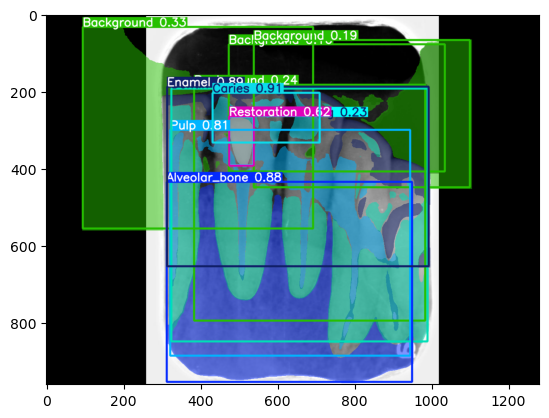

In [38]:
import matplotlib.pyplot as plt
def show_img_by_path(img_path):
    test_img=cv2.cvtColor(cv2.imread(img_path),cv2.COLOR_BGR2RGB)
    plt.imshow(test_img)
    plt.show()
show_img_by_path('runs\segment\predict3\caries-0.6741573-260-760_1_2022052768.png')

In [4]:
# 查看模型標籤
from ultralytics import YOLO

# 載入 YOLOv8 模型
model_path = 'dentistry_yolov9e-seg_all_20240815_4.34.pt'
model = YOLO(model_path)

# 查看模型的標籤
labels = model.names
print("Model Labels:\n", labels)


Model Labels:
 {0: 'Alveolar_bone', 1: 'Caries', 2: 'Crown', 3: 'Dentin', 4: 'Enamel', 5: 'Implant', 6: 'Mandibular_alveolar_nerve', 7: 'Maxillary_sinus', 8: 'Periapical_lesion', 9: 'Post_and_core', 10: 'Pulp', 11: 'Restoration', 12: 'Root_canal_filling', 13: 'Background'}


標記蛀牙位置

In [23]:
from ultralytics import YOLO
import os
import cv2  # 載入 OpenCV 用於圖像處理
import numpy as np  # 載入 NumPy 用於數據處理

# 設定模型的權重檔路徑
model_path = 'dentistry_yolov9e-seg_all_20240815_4.34.pt'

# 設定推理圖像的資料夾路徑
image_folder = 'origin'
# 載入 YOLO 模型
model = YOLO(model_path)

# 執行推理，並指定推理的影像資料夾
results = model.predict(source=image_folder, save=False, imgsz=640, conf=0.25)

# 設定結果保存的目錄
output_dir = 'result'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# 遍歷結果
for result in results:
    # 讀取原始影像
    original_image = cv2.imread(result.path)

    # 遍歷每個物件的預測結果
    for box, score, cls, mask in zip(result.boxes.xyxy, result.boxes.conf, result.boxes.cls, result.masks.data):
        if cls == 1:  # 'Caries' 的類別 ID 是 1
            # 提取邊界框的座標
            x1, y1, x2, y2 = map(int, box)

            # 將分割遮罩轉換為 NumPy 陣列
            mask_np = mask.cpu().numpy()  # 將 tensor 轉換為 NumPy 陣列

            # 將遮罩 resize 成與原始影像相同大小
            mask_resized = cv2.resize(mask_np, (original_image.shape[1], original_image.shape[0]))

            # 創建一個與原圖同尺寸的紅色填充圖像（用於上色）
            color_mask = np.zeros_like(original_image)
            color_mask[mask_resized > 0.5] = [0, 255, 0]  # 填充綠色

            # 使用 cv2.addWeighted 來混合原始圖像和紅色遮罩，實現半透明效果
            alpha = 0.5  # 設定透明度 (0.5 代表半透明)
            colored_image = cv2.addWeighted(original_image, 1 - alpha, color_mask, alpha, 0)

            # 儲存處理後的影像
            cv2.imwrite(os.path.join(output_dir, os.path.basename(result.path)), colored_image)



image 1/100 c:\Users\SSTek\Desktop\LianChia\task\v4.42\origin\caries-0.6741573-260-760_1_2022052768.png: 480x640 1 Alveolar_bone, 1 Caries, 1 Dentin, 1 Enamel, 1 Pulp, 1 Restoration, 1 Background, 1523.1ms
image 2/100 c:\Users\SSTek\Desktop\LianChia\task\v4.42\origin\caries-0.8304498-273-734_1_2022041847.png: 480x640 1 Alveolar_bone, 1 Caries, 1 Dentin, 1 Enamel, 1 Pulp, 1 Restoration, 1 Background, 1427.5ms
image 3/100 c:\Users\SSTek\Desktop\LianChia\task\v4.42\origin\caries-0.8355091-269-741_1_2022060118.png: 480x640 1 Alveolar_bone, 1 Caries, 1 Crown, 1 Dentin, 1 Maxillary_sinus, 1 Post_and_core, 1 Restoration, 1 Root_canal_filling, 1 Background, 1457.7ms
image 4/100 c:\Users\SSTek\Desktop\LianChia\task\v4.42\origin\caries-0.8421053-22-1236_0_2022052776.png: 480x640 1 Alveolar_bone, 1 Caries, 1 Dentin, 1 Enamel, 1 Pulp, 1 Restoration, 1 Background, 1281.2ms
image 5/100 c:\Users\SSTek\Desktop\LianChia\task\v4.42\origin\caries-0.845815-33-1214_1_2022041830.png: 480x640 1 Alveolar_bon

<>:1: SyntaxWarning: invalid escape sequence '\c'
<>:1: SyntaxWarning: invalid escape sequence '\c'
C:\Users\SSTek\AppData\Local\Temp\ipykernel_5764\3470411208.py:1: SyntaxWarning: invalid escape sequence '\c'
  show_img_by_path('result\caries-0.6741573-260-760_1_2022052768.png')


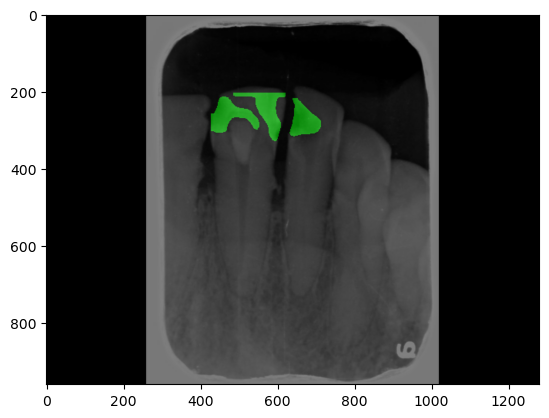

In [39]:
show_img_by_path('result\caries-0.6741573-260-760_1_2022052768.png')